In [8]:
import GEOparse
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and preprocess the GSE dataset
gse = GEOparse.get_GEO("GSE11691")
expression_data = pd.DataFrame({
    gsm: gse.gsms[gsm].table.set_index('ID_REF')['VALUE']
    for gsm in gse.gsms.keys()
}).T

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(expression_data)



01-Sep-2024 11:58:18 DEBUG utils - Directory ./ already exists. Skipping.
01-Sep-2024 11:58:18 INFO GEOparse - File already exist: using local version.
01-Sep-2024 11:58:18 INFO GEOparse - Parsing ./GSE11691_family.soft.gz: 
01-Sep-2024 11:58:18 DEBUG GEOparse - DATABASE: GeoMiame
01-Sep-2024 11:58:18 DEBUG GEOparse - SERIES: GSE11691
01-Sep-2024 11:58:18 DEBUG GEOparse - PLATFORM: GPL96
01-Sep-2024 11:58:19 DEBUG GEOparse - SAMPLE: GSM296875
01-Sep-2024 11:58:19 DEBUG GEOparse - SAMPLE: GSM296876
01-Sep-2024 11:58:19 DEBUG GEOparse - SAMPLE: GSM296877
01-Sep-2024 11:58:19 DEBUG GEOparse - SAMPLE: GSM296878
01-Sep-2024 11:58:20 DEBUG GEOparse - SAMPLE: GSM296879
01-Sep-2024 11:58:20 DEBUG GEOparse - SAMPLE: GSM296880
01-Sep-2024 11:58:20 DEBUG GEOparse - SAMPLE: GSM296881
01-Sep-2024 11:58:20 DEBUG GEOparse - SAMPLE: GSM296882
01-Sep-2024 11:58:20 DEBUG GEOparse - SAMPLE: GSM296883
01-Sep-2024 11:58:20 DEBUG GEOparse - SAMPLE: GSM296884
01-Sep-2024 11:58:20 DEBUG GEOparse - SAMPLE: GSM

### Apply LASSO to select relevant genes and Use a specific alpha value to ensure some features are selected

Silhouette Score: 0.30727010949657463


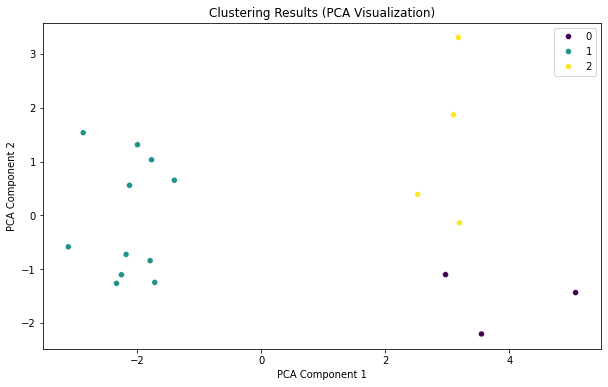

In [9]:
# Step 3: Apply LASSO to select relevant genes

alpha_value = 0.01  # You can adjust this value
lasso = Lasso(alpha=alpha_value)
lasso.fit(X_scaled, np.random.choice([0, 1], size=expression_data.shape[0]))

lasso_coef = lasso.coef_

# Ensure some features are selected
if np.sum(lasso_coef != 0) == 0:
    print("No features were selected. Consider lowering the alpha value.")
else:
    # Select genes with non-zero coefficients
    selected_genes = expression_data.columns[lasso_coef != 0]
    X_selected = X_scaled[:, lasso_coef != 0]

    # Step 4: Clustering on selected features
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_selected)

    # Step 5: Evaluate and visualize clusters
    # Silhouette Score
    silhouette_avg = silhouette_score(X_selected, clusters)
    print(f"Silhouette Score: {silhouette_avg}")

    # PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_selected)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
    plt.title('Clustering Results (PCA Visualization)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()
